<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Assignment2_colab_predictcreditrisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspect any missing values:
age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64
Inspect Data - Display first few(5) rows of dataset:
   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1
Inspect Data - Display last few(5) rows of dataset:
     age  ed  employ  address  income  debtinc  creddebt   othdebt  default
695   36   2       6       15      27      4.6  0.262062  0.979938        1
696   29   2       6        4      21     11.5  0.369495  2.045505        0
697   33   1      15        3      32      7.6  0.

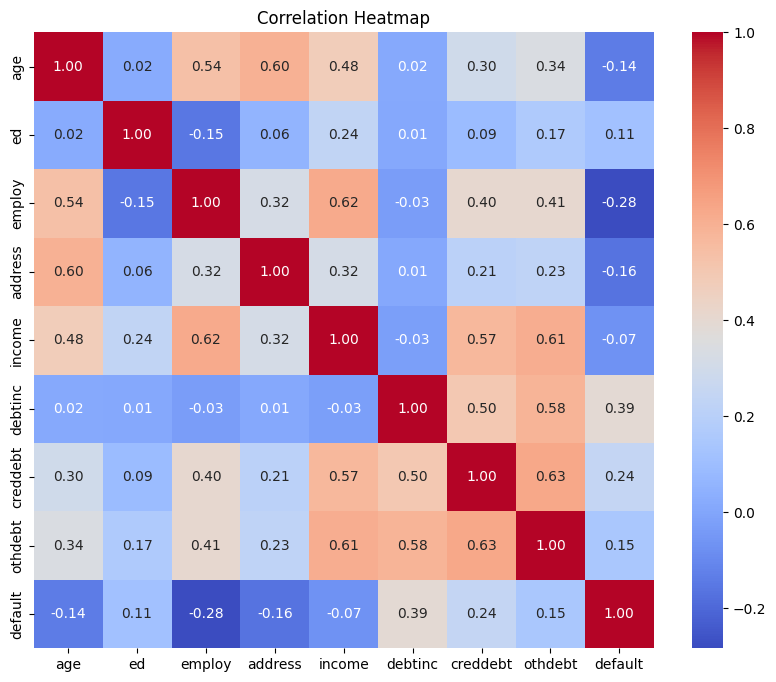

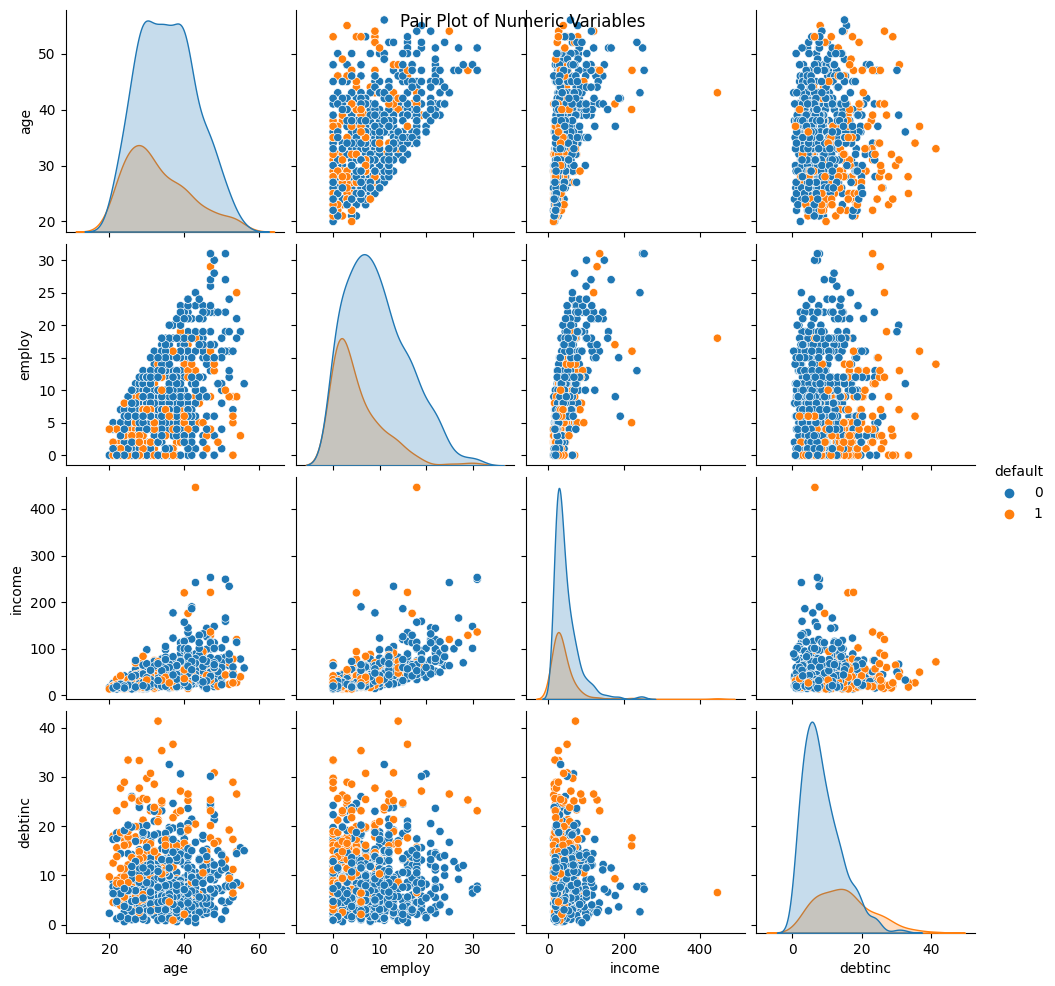

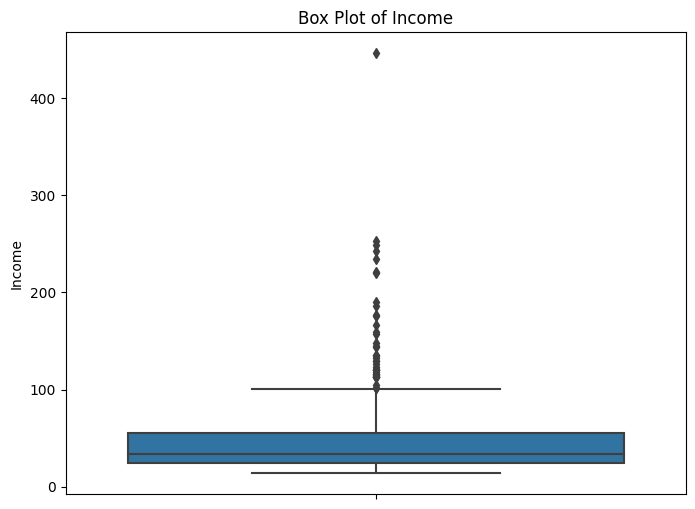

Best Model Accuracy: 0.85
Best Model Confusion Matrix:
 [[102   4]
 [ 17  17]]
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       106
           1       0.81      0.50      0.62        34

    accuracy                           0.85       140
   macro avg       0.83      0.73      0.76       140
weighted avg       0.85      0.85      0.84       140



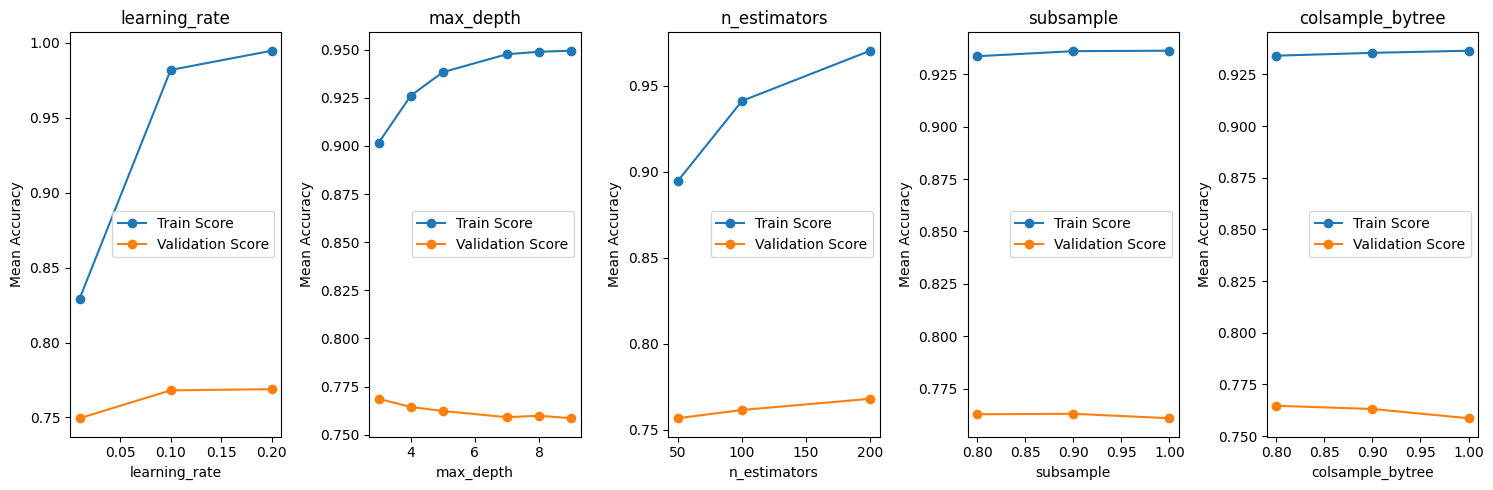

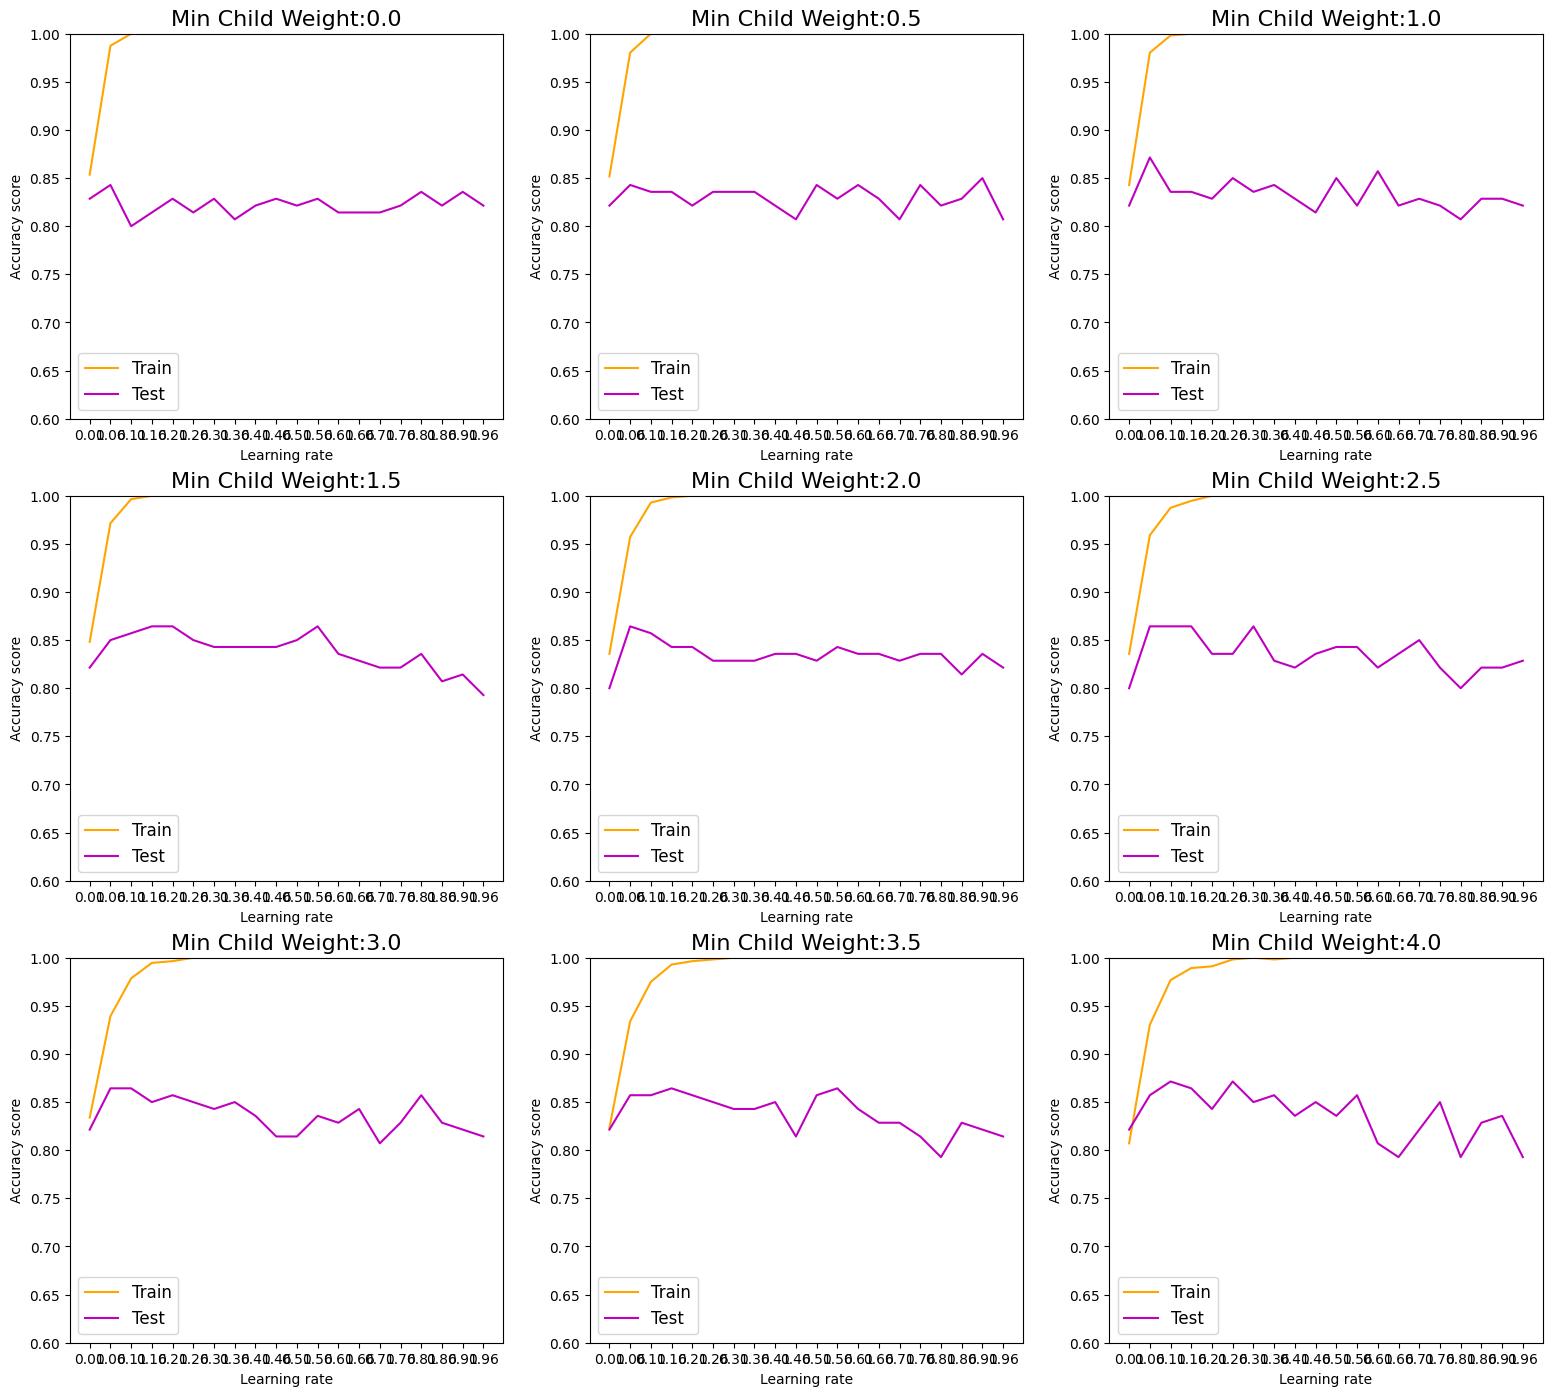

In [ ]:
###############################################################################################
# Assignment: Credit Risk Prediction with XGBoost                                             #
# Objective : Build an XGBoost classifier to predict credit default based on a given dataset. #
# Author: Prasad S Anvekar                                                                    #
# Date: 15 Dec 2023                                                                           #
###############################################################################################

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
data = pd.read_csv(url, nrows=700)

# Data exploration & Preprocessing
# Check for any missing values
print('Inspect any missing values:')
print(data.isnull().sum())

# To view the first 5 rows of the datasets
print('Inspect Data - Display first few(5) rows of dataset:')
print(data.head())

# To view the last 5 rows of the datasets
print('Inspect Data - Display last few(5) rows of dataset:')
print(data.tail())

# To view the column details of the datasets. To choose the right target variable.
print('Inspect Data - Describe the column in the dataset:')
print(data.describe())

# to check the data types
print('Inspect Data - check data types:')
print(data.dtypes)

# Create a heatmap to visualize the correlation between numeric values
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Create a pair plot to visualize relationships between numeric values
sns.pairplot(data,vars=['age','employ','income','debtinc'],hue='default')
plt.suptitle("Pair Plot of Numeric Variables")
plt.show()

# Create a box plot to visualize the distribution of income
plt.figure(figsize=(8,6))
sns.boxplot(y='income',data=data)
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()

# Split the data into features (independent variables) and the target variable (default or not).
X = data.drop('default', axis=1)
y = data['default']

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
X_categorical = X.select_dtypes(include=['object'])
X[X_categorical.columns] = X_categorical.apply(lambda col: le.fit_transform(col))


# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a classification model (in this case, a XGBoost classifier)
classifier = xgb.XGBClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 8, 9],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Use GridSearchCV for hyperparameter tuning

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)


# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)


# Evaluate the best model & Print the results

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Best Model Confusion Matrix:\n", confusion)

# Display best parameters
print("Best Parameters:", best_params)

classification_rep = classification_report(y_test, y_pred)

# Display classification report for the best model
print("Classification Report for Best Model:\n", classification_rep)

# Plot learning curves
results = pd.DataFrame(grid_search.cv_results_)
param_col = [f'param_{param}' for param in param_grid.keys()]

fig, axs = plt.subplots(1, len(param_col), figsize=(15, 5))

for i, param_col in enumerate(param_col):
    param_values = results[param_col].unique()
    mean_train_scores = results.groupby(param_col)['mean_train_score'].mean()
    mean_test_scores = results.groupby(param_col)['mean_test_score'].mean()

    axs[i].plot(param_values, mean_train_scores, label='Train Score', marker='o')
    axs[i].plot(param_values, mean_test_scores, label='Validation Score', marker='o')

    axs[i].set_title(param_col[6:])  # Removing 'param_' for better title
    axs[i].set_xlabel(param_col[6:])
    axs[i].set_ylabel('Mean Accuracy')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Testing the data using different learning rate range and using different hypertuning parameters min_child_weight
learning_rate_range = np.arange(0.01, 1, 0.05)
fig = plt.figure(figsize=(19,17))
idx = 1

# grid search

for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        classifier.fit(X_train, y_train)
        train.append(classifier.score(X_train,y_train))
        test.append(classifier.score(X_test,y_test))
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Train')
    plt.plot(learning_rate_range, test, c='m', label='Test' )
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min Child Weight:" + str(weight)
    plt.title(title,size = 16)
plt.show()



